# Basic Finite Element Modeling
## Outcomes
## 1. Understand linear elastic stress is computed w.r.t. the original geometry i.e. does not account for change in areas as with all linear analyses done in other structures courses.
## 2. Understand that large rotations result in large stresses that are not physical as linearization asusmpotions w.r.t. angles are assumed small are violated
## 3. Able to identify when a computed FEM result is prone to these issues

# Two dimensional modelling
## Problems consider the following aspects:
## 1. Large translations and large rotations
## 2. Stress expressed in terms of original geometry i.e. implications for small deformation versus large deformations

### To illustrate some basic characteristics of 2D linear FEM, consider a simple geometry of a rectangle with thickness 1. Its remaining dimensions are given below. The material properties are those of steel with $E = 210 GPa$ and $\nu = 0.3$. A single 2D Q8 element is used to represent the geometry.

<img src="basics_bar.jpg" style="width: 300px;"/>

<img src="basics_mesh.jpg" style="width: 250px;"/>

## Rigid body translation

### Firstly we consider the behaviour of linear FEM in the context of rigid body movements. In this case we consider rigid body translation, which is simply moving the body around in 2D space as seen below. 

<img src="translation.jpg" style="width: 450px;"/>

## This scenario is implemented in a patch test (a basic test which enables probing of isolated concepts) constructed in the input file "q8_patch_translate.inp". A 2D linear FEM code is given, with which the input file can be executed and the results displayed. Run the given input file and consider the solutions.

 
 
 
-----------------------------------------------
MKM321: Two-Dimensional Linear Finite Element Program
-----------------------------------------------
-----------------------------------------------
Done processing input file :   0.0006 seconds.
Done assembling K and F    :   0.0058 seconds.
Done solving system        :   0.0951 seconds.
Done computing reactions   :   0.0005 seconds.
Done computing stresses    :   0.0023 seconds.
Done post-processing stress:   0.0043 seconds.
Done writing output        :   0.0026 seconds.


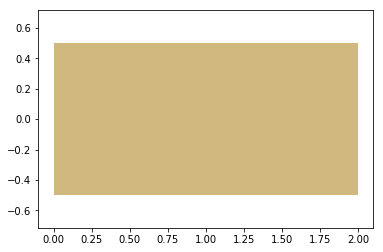

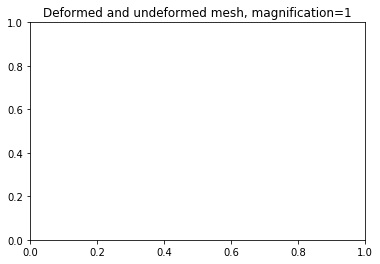

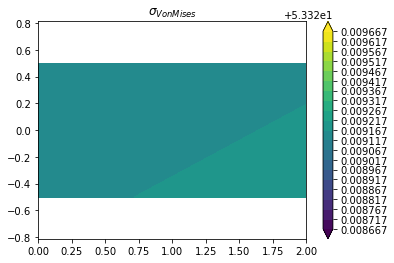

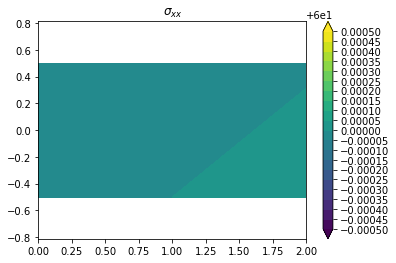

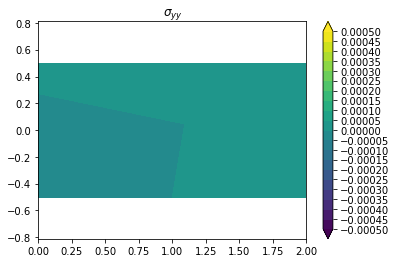

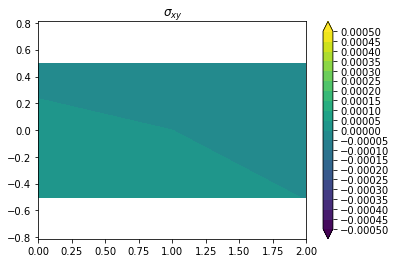

In [1]:
from fem_main_program import launch_fem
U, ReactionForces, VonMises, SXX, SYY, SXY = launch_fem('q8_patch_pull',MagFac=1)

 
 
 
-----------------------------------------------
MKM321: Two-Dimensional Linear Finite Element Program
-----------------------------------------------
-----------------------------------------------
Done processing input file :   0.0005 seconds.
Done assembling K and F    :   0.0101 seconds.
Done solving system        :   0.0005 seconds.
Done computing reactions   :   0.0004 seconds.
Done computing stresses    :   0.0025 seconds.
Done post-processing stress:   0.0045 seconds.
Done writing output        :   0.0010 seconds.


<IPython.core.display.Javascript object>


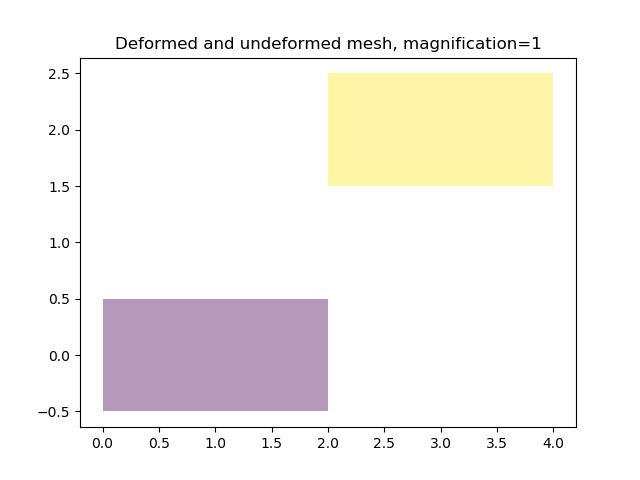

<IPython.core.display.Javascript object>


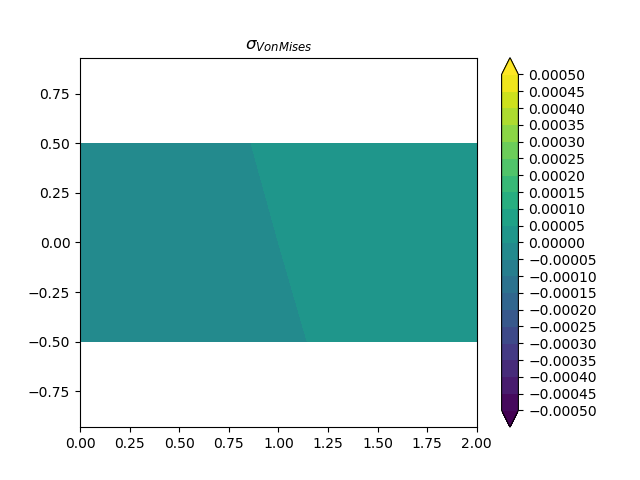

<IPython.core.display.Javascript object>


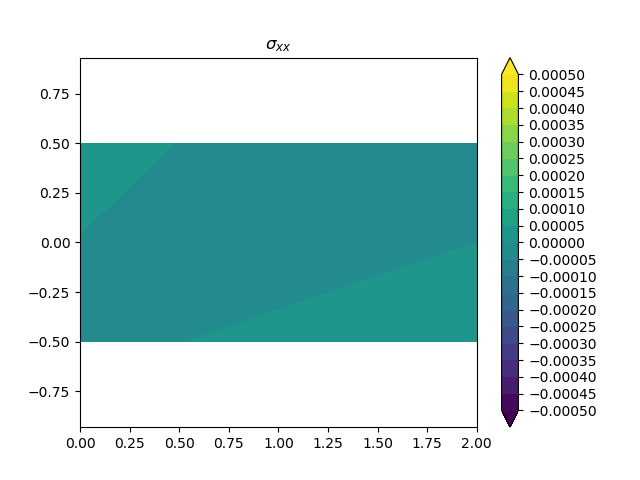

<IPython.core.display.Javascript object>


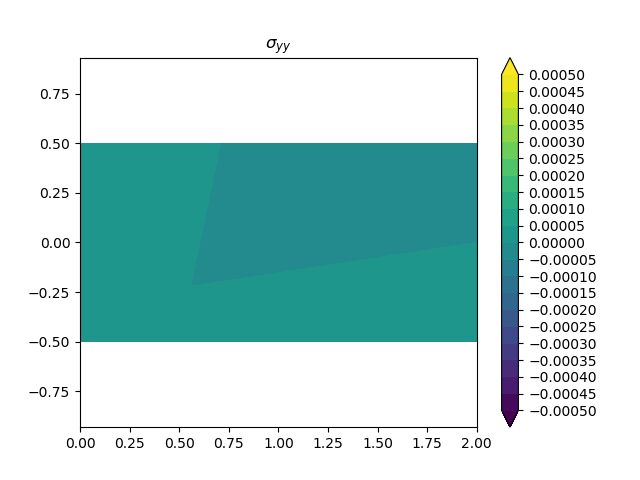

<IPython.core.display.Javascript object>


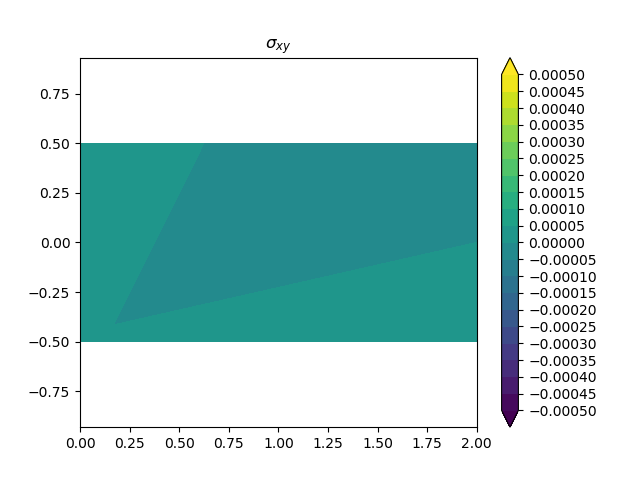

In [7]:
%matplotlib notebook
from fem_main_program import launch_fem

U, ReactionForces, VonMises, SXX, SYY, SXY = launch_fem('q8_patch_translate',MagFac=1)

In [2]:
SXY

matrix([[ 4.28965721e-14,  1.25024305e-14, -1.63518627e-14,
          2.54869343e-15]])

## Consider the Von Mises stresses. There are no significant stresses, as expected since the analysis correspond to a body that undergoes a quasi-static (infinitely slow translation i.e. there are no interntial forces) rigid body translation.

## Ridgid body rotation

### Now a patch test is conducted which tests rigid body translation. The same geometry is now exposed to a constant rotation, as demonstrated below.

<img src="rotation.jpg" style="width: 250px;"/>

## The input file to this problem is given as "q8_patch_rotate.inp". Run this file and consider the outputs.

 
 
 
-----------------------------------------------
MKM321: Two-Dimensional Linear Finite Element Program
-----------------------------------------------
-----------------------------------------------
Done processing input file :   0.0008 seconds.
Done assembling K and F    :   0.0069 seconds.
Done solving system        :   0.0008 seconds.
Done computing reactions   :   0.0004 seconds.
Done computing stresses    :   0.0021 seconds.
Done post-processing stress:   0.0082 seconds.
Done writing output        :   0.0032 seconds.


<IPython.core.display.Javascript object>


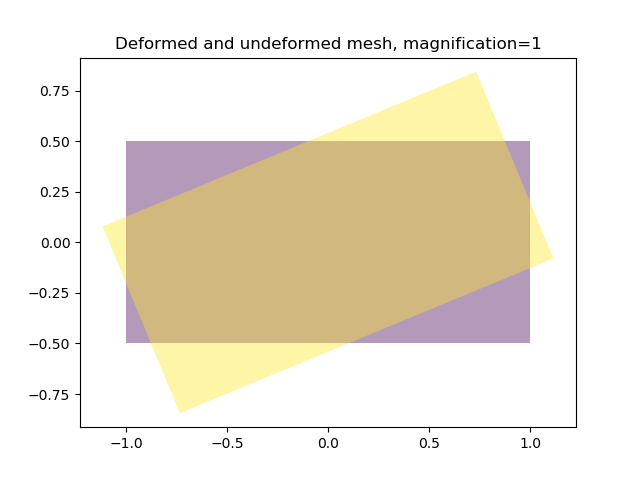

<IPython.core.display.Javascript object>


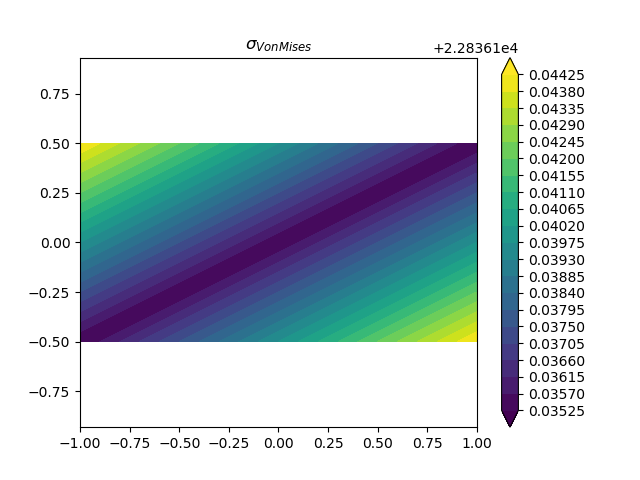

<IPython.core.display.Javascript object>


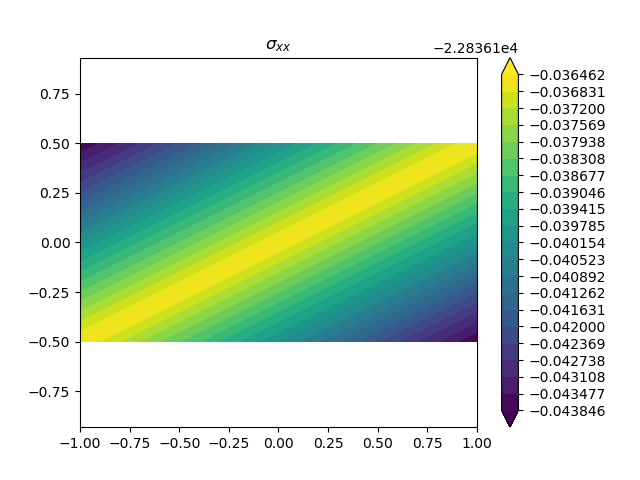

<IPython.core.display.Javascript object>


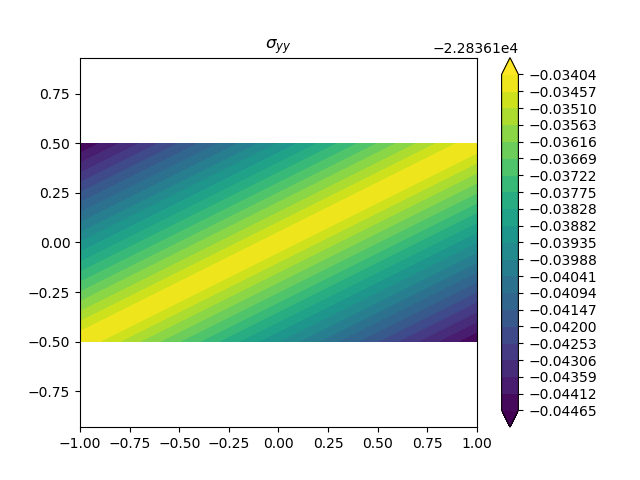

<IPython.core.display.Javascript object>


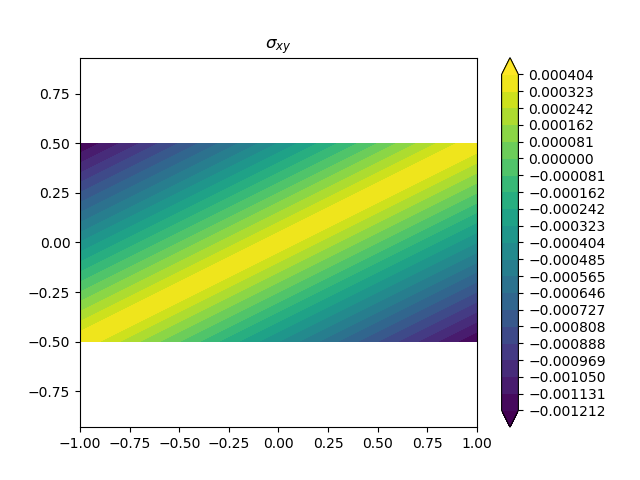

In [3]:
% matplotlib notebook
from fem_main_program import launch_fem

U, ReactionForces, VonMises, SXX, SYY, SXY = launch_fem('q8_patch_rotate', MagFac = 1)

## Consider the Von Mises stresses. There are significant stresses due to a rigid body rotation! The physics of the problem dictate that there should be no stress, since the rotation is a quasi-static (infinitely slow rotation i.e. there are no interntial forces) rigid body rotation. In linear FEM, non-linearity quantities are linearized i.e. $\tan(\theta)$ is linearized to $\theta$, which only holds for small angles of $\theta$. The stresses are due to $\theta$ not being small, and the stresses a result to the violation of these linearized assumptions not holding.
## Implication is that linear FEM is only sensible when a structure undergoes small rotations.

# Deformation in linear FEM

## In the following problem, the same geometry is exposed to a distributed force along the right hand side vertical edge in the $x_1$ direction as shown below. This distributed load translates to the discrete geometry by considering consistent nodal loading with regards to the total force experienced by a given element. The shape is constrained on the left edge by rollers, which prohibit the movement of the edge in the $x_1$ direction, but not in the $x_2$ direction. The bottom left corner of the shape is completely fixed, so that no movement is possible in either direction.

<img src="basics_load.jpg" style="width: 500px;"/>

## The 2D assumption made is that of plane strain. (i.e. the thickness does not change with loading). The load applied in this case is 60N, distributed to the nodes according to consistent nodal loading, as shown. The displacement constraints are shown in red, meaning that the directions indicated in red are prohibited from moving. 

## Small deformation (Applied Force 60N)

## The displacements, reaction forces and Von Mises stresses are given as outputs by the FEM code. Calculate the average stress experienced in the member due to its deformed geometry using a hand calcualtion. The deformed cross section can be determined from the given displacements from the FEM code. Also determine whether the member is in external equilibrium.
## It is evident that the stress in the deformed and undeformed geometries are very similar due to small deformations of the structure.

 
 
 
-----------------------------------------------
MKM321: Two-Dimensional Linear Finite Element Program
-----------------------------------------------
-----------------------------------------------
Done processing input file :   0.0010 seconds.
Done assembling K and F    :   0.0090 seconds.
Done solving system        :   0.0006 seconds.
Done computing reactions   :   0.0006 seconds.
Done computing stresses    :   0.0030 seconds.
Done post-processing stress:   0.0055 seconds.
Done writing output        :   0.0011 seconds.


<IPython.core.display.Javascript object>


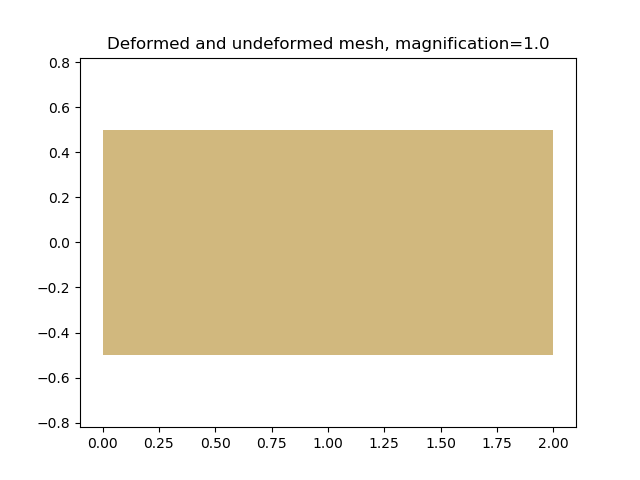

<IPython.core.display.Javascript object>


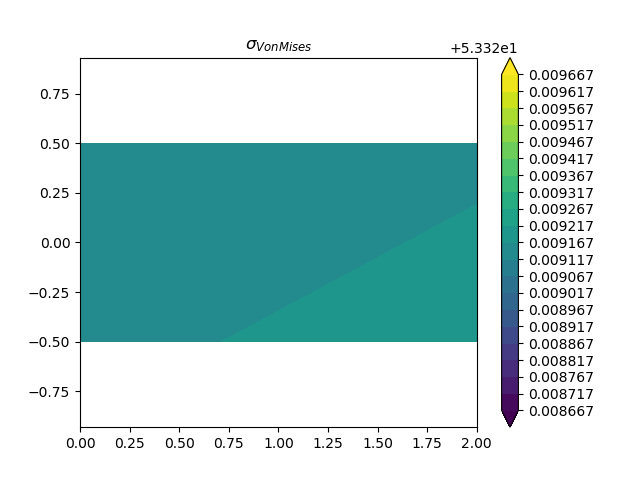

<IPython.core.display.Javascript object>


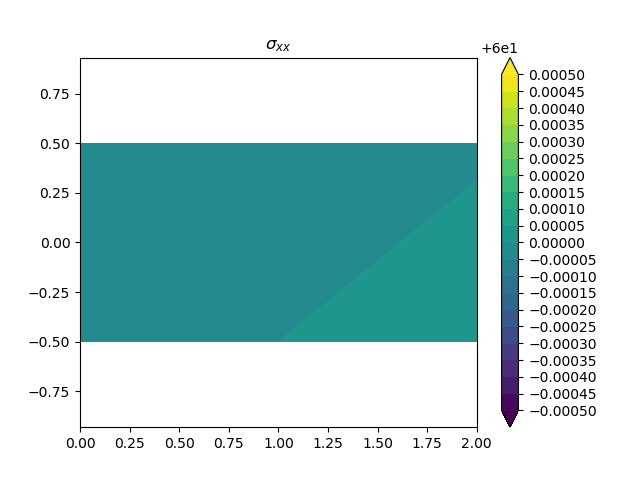

<IPython.core.display.Javascript object>


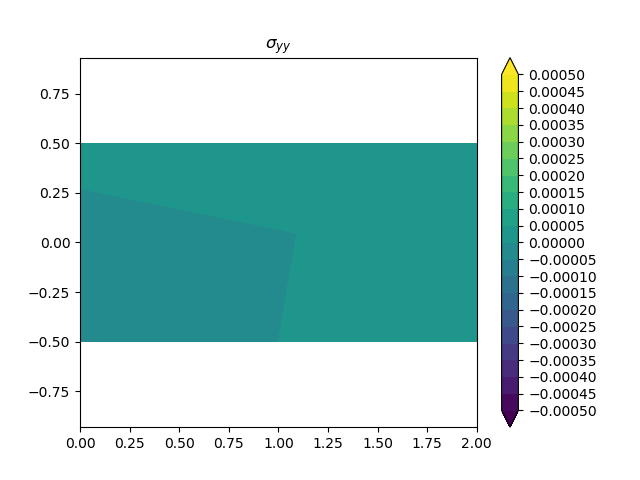

<IPython.core.display.Javascript object>


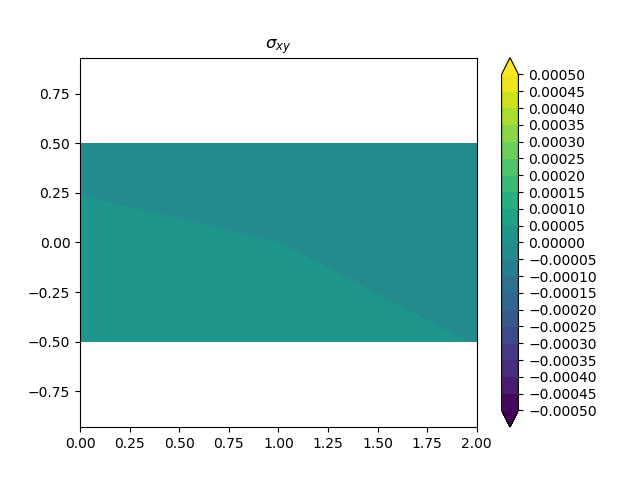

In [4]:
% matplotlib notebook
from fem_main_program import launch_fem

U, ReactionForces, VonMises, SXX, SYY, SXY = launch_fem('q8_patch_pull')

In [6]:
import numpy as np
print(np.sum(ReactionForces))

print('Applied load is 60 N - hence sum of applied forces and reaction forces in x = -60 + 60 = 0 N - equilibrium!')

-59.999999999999844
Applied load is 60 N - hence sum of applied forces and reaction forces in x = -60 + 60 = 0 N - equilibrium!


## Is the hand calculated stress consistent with that of the FEM?

Yes - hand calc stress = 60 N / (1 mm**2) = 60 MPa
Spot on with sigma_xx

## Large deformation (Applied Force 60 kN)

## The problem is now repeated, but a much larger force of 60kN is applied. Calculate the stress using the original and deformed geometry. It is evident that the linear FEM solution corresponds to the stress in the original geometry. This stress expressed using the original geometry area is around 7 MPa less than the stress using the updated geometry i.e. not conservative from a strength calculation.
## Linear FEM similar to linear structural analysis does not express stress in the updated geometry but in the original geometry.
## Implication is the linear FEM is only sensible when deformations are small i.e. difference between original and deformed geometries when expressing stress are negligible.

 
 
 
-----------------------------------------------
MKM321: Two-Dimensional Linear Finite Element Program
-----------------------------------------------
-----------------------------------------------
Done processing input file :   0.0009 seconds.
Done assembling K and F    :   0.0085 seconds.
Done solving system        :   0.0006 seconds.
Done computing reactions   :   0.0004 seconds.
Done computing stresses    :   0.0069 seconds.
Done post-processing stress:   0.0045 seconds.
Done writing output        :   0.0040 seconds.


<IPython.core.display.Javascript object>


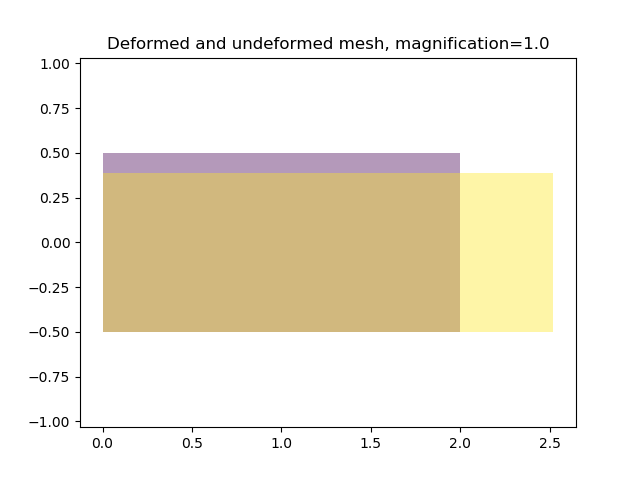

<IPython.core.display.Javascript object>


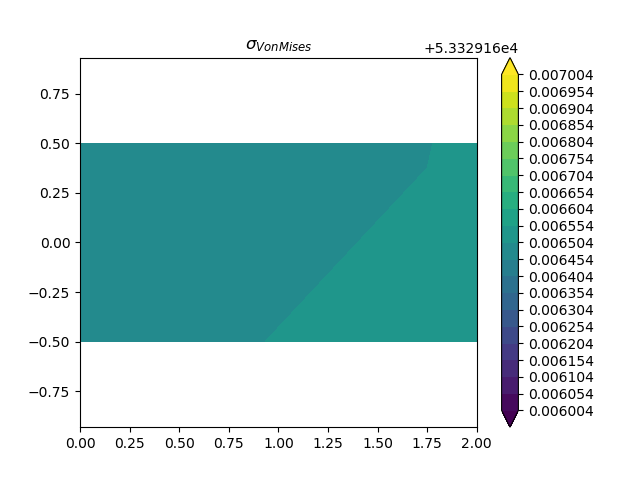

<IPython.core.display.Javascript object>


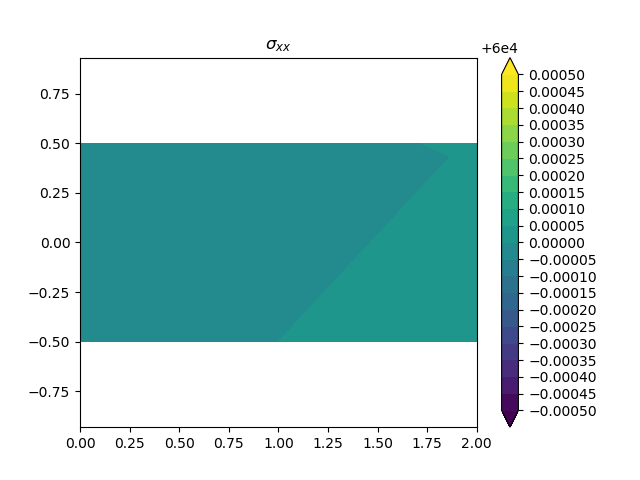

<IPython.core.display.Javascript object>


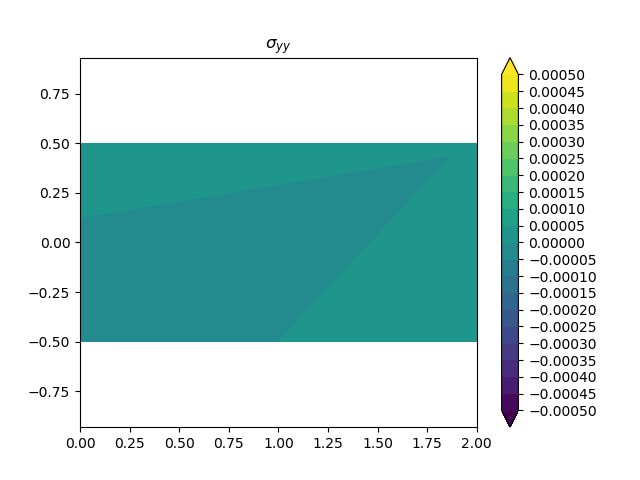

<IPython.core.display.Javascript object>


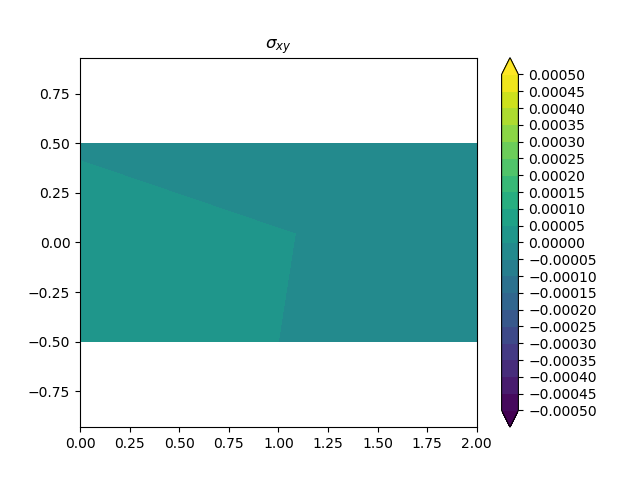

In [9]:
% matplotlib notebook
from fem_main_program import launch_fem

U, ReactionForces, VonMises, SXX, SYY, SXY = launch_fem('q8_patch_pull_more')

## Is the hand calc stress consistent with that of the FEM?

## Is the geometry in equilibrium?

## What does the investigation yield in terms of the validity of FEM in the context of small and large deformations?

## Yes - hand calc stress = 60 N / (1 mm**2) = 60 MPa - Spot on with sigma_xx

In [10]:
import numpy as np
print(np.sum(ReactionForces))

print('Applied load is 60 000 N - hence sum of applied forces and reaction forces in x = -60 000 + 60 000 = 0 N - equilibrium!')

-59999.9999999999
Applied load is 60 000 N - hence sum of applied forces and reaction forces in x = -60 000 + 60 000 = 0 N - equilibrium!


Large deformations change in geometry is significant enough that estimating stress w.r.t. original geomtrical dimensions is inaccurate. Tension members has reduction in cross sectional areas, which is not conservative.

In [11]:
U

array([[ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 5.20000000e-01],
       [ 5.76795556e-16],
       [ 5.20000000e-01],
       [-1.11428571e-01],
       [ 0.00000000e+00],
       [-1.11428571e-01],
       [ 2.60000000e-01],
       [ 4.16333634e-16],
       [ 5.20000000e-01],
       [-5.57142857e-02],
       [ 2.60000000e-01],
       [-1.11428571e-01],
       [ 0.00000000e+00],
       [-5.57142857e-02]])

In [12]:
ReactionForces

matrix([[-10000.],
        [     0.],
        [-10000.],
        [-40000.]])

In [13]:
VonMises

array([[53329.16650389, 53329.16650389, 53329.16650389, 53329.16650389]])

In [15]:
SXX

matrix([[60000., 60000., 60000., 60000.]])

In [16]:
SYY

matrix([[-4.52135400e-11,  4.94695131e-11,  5.19577308e-12,
          3.05660207e-11]])

In [17]:
SXY

matrix([[ 6.36115042e-11, -1.69401087e-11, -1.06490621e-11,
          1.94621297e-11]])